<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression II

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

sns.set_context("poster")
sns.set(rc={'figure.figsize': (15, 9)})
sns.set_style("whitegrid")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [10]:
# Read CSV
house_csv = pd.read_csv("dat/Sacramento_transactions.csv")

In [11]:
house_csv.shape

(985, 12)

In [12]:
# Check Null Values
house_csv.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [13]:
# Data Types
house_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [14]:
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [15]:
house_csv['zip'] = house_csv['zip'].astype(str)

house_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [16]:
house_csv['sale_date'] = pd.to_datetime(house_csv['sale_date'].str.replace('EDT', 'UTC+4'))

house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768


In [18]:
# Extract day from sale_date and save in a new column
house_csv['day'] = house_csv['sale_date'].dt.day

house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879,21
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028,21
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839,21
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146,21
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768,21


In [20]:
# Describe Data
house_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599
day,985.0,18.217259,2.131239,15.000000,16.000000,19.000000,20.000000,21.000000


In [21]:
house_csv[house_csv['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,206000,38.631481,-121.501880,21
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,244500,38.626671,-121.525970,21
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,263500,38.553867,-121.219141,21
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,320000,38.528575,-121.228600,21
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,339500,38.602416,-121.542965,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,2008-05-15 00:00:00-04:00,138000,38.884150,-121.270277,15
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,2008-05-15 00:00:00-04:00,165000,38.584526,-121.534609,15
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,2008-05-15 00:00:00-04:00,188000,38.884170,-121.270222,15
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,2008-05-15 00:00:00-04:00,200100,38.569943,-121.527539,15


In [23]:
house_csv.loc[house_csv['beds'] == 0, 'type'] = 'Bedless'

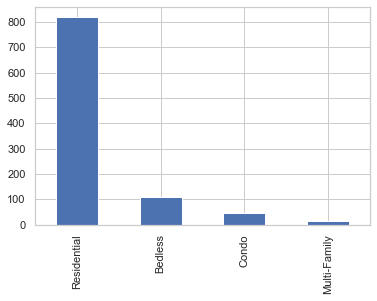

In [25]:
house_csv['type'].value_counts().plot(kind='bar')
plt.show()

In [28]:
# import the library
import folium
import pandas as pd

# Make an empty map
# 37.76, -122.45 is the initital location of SF, USA
m = folium.Map(location=[38.575764, -121.478851], zoom_start=10)

# I can add circle/marker one by one on the map
for i in range(0, len(house_csv.head(1000))):
    folium.Marker(
        location=[house_csv.iloc[i]['latitude'], house_csv.iloc[i]['longitude']]
    ).add_to(m)
    
display(m)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

## ANSWER
we are trying to predict price

#### 2.2 List all possible variables which might be Independent/Predictor variable.

## ANSWER
sq_ft, beds, baths, type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [30]:
# ANSWER
house_csv.corr()

,beds,baths,sq__ft,price,latitude,longitude,day
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993,-0.003317
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582,0.027585
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742,0.052710
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485,0.050196
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925,-0.043809
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000,-0.004985
day,-0.003317,0.027585,0.052710,0.050196,-0.043809,-0.004985,1.000000


#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [31]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [34]:
# ANSWER

X = house_csv['sq__ft'].values.reshape(-1,1)
Y = house_csv['price']

linreg = LinearRegression()
linreg.fit(X, Y)

LinearRegression()

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [35]:
# ANSWER
linreg.score(X, Y)

0.11148717682951437

### 3. Splitting Data

In [36]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [37]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

#### 3.2 Check Shape, Sample of Test Train Data

In [42]:
# ANSWER
## Check training/test data
print('X_train is a %s' % type(X_train))
print('X_train rows: ', X_train.shape[0])
print(X_train[:10])

print('y_train is a %s' % type(y_train))
print('y_train rows: ', y_train.shape[0])
print(y_train[:10])

X_train is a <class 'numpy.ndarray'>
X_train rows:  788
[[   0]
 [1595]
 [1320]
 [2222]
 [   0]
 [ 901]
 [1280]
 [1011]
 [1503]
 [ 901]]
y_train is a <class 'pandas.core.series.Series'>
y_train rows:  788
154    600000
295    339000
197    148500
329    582000
224    202500
370    121500
65     192067
614     85000
250    245000
24     125000
Name: price, dtype: int64


In [43]:
# ANSWER
## Check training/test data
print('X_test is a %s' % type(X_test))
print('X_test rows: ', X_test.shape[0])
print(X_test[:10])

print('y_test is a %s' % type(y_test))
print('y_test rows: ', y_test.shape[0])
print(y_test[:10])

X_test is a <class 'numpy.ndarray'>
X_test rows:  197
[[1816]
 [   0]
 [1638]
 [1013]
 [1718]
 [   0]
 [1118]
 [1351]
 [3440]
 [1032]]
y_test is a <class 'pandas.core.series.Series'>
y_test rows:  197
456    240000
850    533000
941    191675
347     85000
300    361948
934    188000
20     122000
395    158000
150    489332
607     65000
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [44]:
# ANSWER
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[56.64002524] 160798.26494457555


In [45]:
# ANSWER
linreg.score(X_test, y_test)

0.09914352024816753

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [47]:
x = [[1204]]
Ypred = linreg.predict(x)
print('Predicted house price: ', Ypred[0])

Predicted house price:  228992.85533528833


#### Find the error (Mean Squared Error)

In [51]:
# Predict price from X_test

y_preds = linreg.predict(X_test)

y_preds[:10]

array([263656.55078306, 160798.26494458, 253574.62629008, 218174.61051417,
       258105.8283094 , 160798.26494458, 224121.81316452, 237318.93904578,
       355639.95177518, 219250.77099376])

In [52]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds, squared=True)

15255192925.239183



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



